<a href="https://colab.research.google.com/github/joocoo/csce-478-1/blob/master/%60daffer_jacob_shimwela_lucy_khatiwada_aayush_assignment1_ipynb%60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jacob Daffer, Lucy Shimela, Aayush Khatiwada
## Assignment 1 : K Nearest Neighbors Model for Binary Clasification

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1) Write a function to calculate and return the Euclidean distance of two vectors.

In [2]:
# takes two 1D numpy arrays, x and y
def euclidian(x,y):
    return np.sqrt(np.sum((x-y)**2))

2) Write a function to calculate and return the Manhattan distance of two vectors.

In [3]:
# takes two 1D numpy arrays, x and y
def manhattan(x,y):
    return np.sum(abs(x-y))

In [4]:
def minkowski(x,y,p):
    return np.sum(abs(x-y)**p)**(1/p)

3) Write a function to calculate and return the accuracy and generalization error of two vectors. (Refer to under question 4)

4) Write three functions to compute: precision, recall and F1 score.

In [5]:
# Functions made by using the listed formulas from this source: 
# https://en.wikipedia.org/wiki/Confusion_matrix

# recall
def true_positive_rate(TP, FN):
    return (TP / (TP + FN))
# selectivity
def true_negative_rate(TN, FP):
    return (TN / (TN + FP))
# precision
def positive_predictive_value(TP, FP):
    return (TP / (TP + FP))
def negative_predictive_value(TN, FN):
    return (TN / (TN + FN))
# miss rate
def false_negative_rate(FN, TP):
    return (FN / (FN + TP))
# fall-out
def false_positive_rate(FP, TN):
    return (FP / (FP + TN))

def false_discovery_rate(FP, TP):
    return (FP / (FP + TP))

def false_omission_rate(FN, TN):
    return (FN / (FN + TN))

def prevalence_threshold(TPR, TNR):
    return (np.sqrt(TPR(-TNR + 1) + TNR - 1)) / (TPR + TNR - 1)

def threat_score(TP, FN, FP):
    return TP / (TP + FN + FP)

def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

# added to complete question 3
def generalization_error(ACC):
    return abs(ACC - 1)

def balanced_accuracy(TPR, TNR):
    return (TPR + TNR) / 2

def f1_score(PPV, TPR):
    return 2 * ((PPV * TPR) / (PPV + TPR))

def matthews_correlation_coefficient(TP, TN, FP, FN):
    return (TP * TN - FP * FN) / np.sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))

def fowlkes_mallows_index(PPV, TPR):
    return np.sqrt(PPV * TPR)

def bookmaker_informedness(TPR, TNR):
    return TPR + TNR - 1

def markedness(PPV, NPV):
    return PPV + NPV -1

5) Write a function to compute the confusion matrix of two vectors.

In [6]:
def confusion_matrix_binary(actual, prediction):
    return pd.crosstab(actual, prediction, rownames=['actual'], colnames=['predictions'])
def confusion_matrix_binary_values(cm):
    # returns TN, FP, FN, TP
    return cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

6) Write a function to generate the Receiver Operating Characteristic (ROC) curve.

In [7]:
# well in order to verify the 
def roc_curve(tpr_list, fpr_list):
    if (len(tpr_list) != len(fpr_list)):
        raise Exception('The list of TPR values is not the same size as the list of FPR values.')
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_list, tpr_list, 'b')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

7) Write a function to compute area under curve (AUC) for the ROC curve.

In [8]:
def compute_auc(tpr_list, fpr_list):
    return np.trapz(tpr_list, fpr_list)

0.33499999999999996


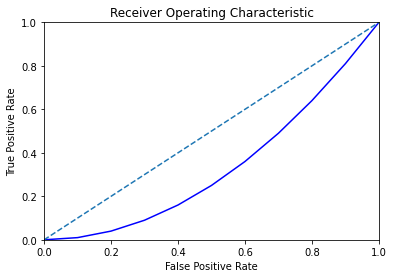

In [9]:
# test compute_auc

test_fpr_list = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) # parabola x
test_tpr_list = np.array([0, 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1]) # parabola y

print(compute_auc(test_tpr_list, test_fpr_list)) # Integrating gives 1/3 (0.3333)
roc_curve(tpr_list=test_tpr_list, fpr_list=test_fpr_list) # if under 1/2 (0.5) should have a line below the diagnal

8) Write a function to generate the precision-recall curve.

In [10]:
def generate_precision_recall_curve(actual, predicted):
    asc_score_indices = np.argsort(predicted, kind="mergesort")
    predicted = predicted[asc_score_indices]
    actual = actual[asc_score_indices]

    thresholds = np.arange(predicted.size)
    precisions = np.empty(thresholds.size)
    recalls = np.empty(thresholds.size)

    for threshold in thresholds[1:]:
        this_prediction = np.empty(thresholds.size)
        this_prediction[threshold:] = 1
        this_prediction[:threshold] = 0
        cm = confusion_matrix_binary(actual, this_prediction)
        _, FP, FN, TP = confusion_matrix_binary_values(cm)
        recalls[threshold] = true_positive_rate(TP, FN)
        precisions[threshold] = positive_predictive_value(TP, FP)

    thresholds = np.divide(thresholds, thresholds[-1])

    fig = plt.figure(figsize=(10, 6))
    plt.plot(thresholds[1:-1], precisions[1:-1], "b--", linewidth=5, label="Precision")
    plt.plot(thresholds[1:-1], recalls[1:-1], "g-", linewidth=3, label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.ylim([0, 1.1])
    plt.show()  

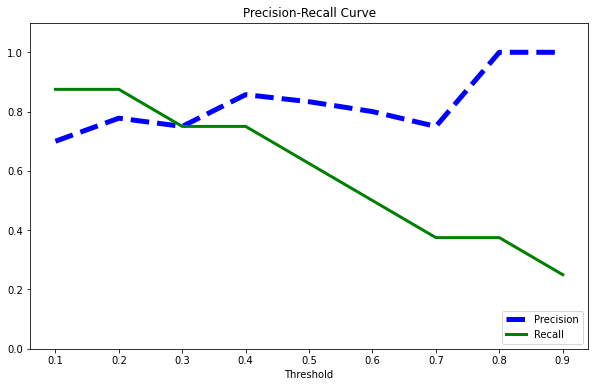

In [11]:
# test generate_precision_recall_curve

generate_precision_recall_curve(np.array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]), np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]))

9) ImplementaKNN_Classifiermodel class. It should have the following three methods.

    1. fit
    2. predict
    3. __init__

In [12]:
class KNN_Classifier:
    
    def __init__(self):
        self.algorithm = euclidian
        pass
    #
    # The fit Function only stores the training data
    # X: is the the rows of data that is being used to make predictions each element represents a different feature or column.
    # Y: is the pre-provided label set to label the data in X
    # n_neighbors: is the size of the closest neigbors based on the determined distance mechanizim.
    # wieights: if you want to have a weighted label set (which more likely means that Y is not binary)
    # **kwargs ---- for furture work
    #
    def fit(self, X, Y, n_neighbors, weights='uniform', **kwargs):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        self.k = n_neighbors
        self.weights = weights
        for key, value in kwargs.items():
          if (key == 'algorithm'):
            self.algorithm = value
        if (Y.ndim != 1): raise Exception('Y is not a 1D array\n')
        if ((weights != 'uniform') and (weights != 'distance')):
            raise Exception('weights can only take the following possible values "distance" or "unifrom"(Default)\n')
        pass
    #
    # The predict function creates a prediction set
    # X_T: a test set that contains rows of data and columns of features to build a predicted label set
    #
    # returns 1D numpy array
    #
    def predict(self, X_T):
        predictions = np.zeros((len(X_T),))
        for i in range(len(X_T)):
            distances = np.zeros((len(self.X),2))
            votes = []
            for j in range(len(self.X)):
                dist = self.algorithm(self.X[j], X_T[i])
                if ((self.weights == 'distance') and dist != 0): dist = dist**(-1)
                elif (self.weights == 'distance' and dist == 0): dist = np.inf
                distances[j][0] = dist
                distances[j][1] = j
            if (self.weights == 'distance'): distances = distances[distances[:,0].argsort()[::-1]]
            else: distances = distances[distances[:,0].argsort()]
            k_distances = distances[0:self.k]
            for j in k_distances:
                votes.append(self.Y[int(j[1])])
            answer = Counter(votes).most_common(1)[0][0]
            predictions[i] = answer
        return predictions
    pass


10) Read in the winequality-white.csvfile as a Pandas data frame.

In [13]:
import urllib
downloader = urllib.request.URLopener()
downloader.retrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", "winequality-white.csv")
downloader.close()
df = pd.read_csv('winequality-white.csv', delimiter=';')
cols = df.columns.to_list()
cols = { i:i.replace(' ','_') for i in cols}
df.rename(columns=cols, inplace=True)

11) The target will be the “quality”column which represents rating of wine and ranges from 3 to 8.  

1.   You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5).
2.   Your target vector should have 0 (representing “bad” quality wine) and 1 (representing “good” quality wine).

In [14]:
df = pd.concat([df,pd.DataFrame([int(i>5) for i in df['quality']], columns=['good'])], axis=1)

12) Use the techniques from the recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report. 

In [15]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


In [16]:
df.describe().to_latex(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid'])

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  fixed\\_acidity &  volatile\\_acidity &  citric\\_acid \\\\\n\\midrule\ncount &    4898.000000 &       4898.000000 &  4898.000000 \\\\\nmean  &       6.854788 &          0.278241 &     0.334192 \\\\\nstd   &       0.843868 &          0.100795 &     0.121020 \\\\\nmin   &       3.800000 &          0.080000 &     0.000000 \\\\\n25\\%   &       6.300000 &          0.210000 &     0.270000 \\\\\n50\\%   &       6.800000 &          0.260000 &     0.320000 \\\\\n75\\%   &       7.300000 &          0.320000 &     0.390000 \\\\\nmax   &      14.200000 &          1.100000 &     1.660000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [17]:
df.describe().to_latex(columns=['residual_sugar', 'chlorides', 'free_sulfur_dioxide'])

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  residual\\_sugar &    chlorides &  free\\_sulfur\\_dioxide \\\\\n\\midrule\ncount &     4898.000000 &  4898.000000 &          4898.000000 \\\\\nmean  &        6.391415 &     0.045772 &            35.308085 \\\\\nstd   &        5.072058 &     0.021848 &            17.007137 \\\\\nmin   &        0.600000 &     0.009000 &             2.000000 \\\\\n25\\%   &        1.700000 &     0.036000 &            23.000000 \\\\\n50\\%   &        5.200000 &     0.043000 &            34.000000 \\\\\n75\\%   &        9.900000 &     0.050000 &            46.000000 \\\\\nmax   &       65.800000 &     0.346000 &           289.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [18]:
df.describe().to_latex(columns=['total_sulfur_dioxide', 'density', 'pH'])

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  total\\_sulfur\\_dioxide &      density &           pH \\\\\n\\midrule\ncount &           4898.000000 &  4898.000000 &  4898.000000 \\\\\nmean  &            138.360657 &     0.994027 &     3.188267 \\\\\nstd   &             42.498065 &     0.002991 &     0.151001 \\\\\nmin   &              9.000000 &     0.987110 &     2.720000 \\\\\n25\\%   &            108.000000 &     0.991723 &     3.090000 \\\\\n50\\%   &            134.000000 &     0.993740 &     3.180000 \\\\\n75\\%   &            167.000000 &     0.996100 &     3.280000 \\\\\nmax   &            440.000000 &     1.038980 &     3.820000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [19]:
df.describe().to_latex(columns=['sulphates', 'alcohol', 'quality'])

'\\begin{tabular}{lrrr}\n\\toprule\n{} &    sulphates &      alcohol &      quality \\\\\n\\midrule\ncount &  4898.000000 &  4898.000000 &  4898.000000 \\\\\nmean  &     0.489847 &    10.514267 &     5.877909 \\\\\nstd   &     0.114126 &     1.230621 &     0.885639 \\\\\nmin   &     0.220000 &     8.000000 &     3.000000 \\\\\n25\\%   &     0.410000 &     9.500000 &     5.000000 \\\\\n50\\%   &     0.470000 &    10.400000 &     6.000000 \\\\\n75\\%   &     0.550000 &    11.400000 &     6.000000 \\\\\nmax   &     1.080000 &    14.200000 &     9.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [20]:
df.describe().to_latex(columns=['good'])

'\\begin{tabular}{lr}\n\\toprule\n{} &         good \\\\\n\\midrule\ncount &  4898.000000 \\\\\nmean  &     0.665169 \\\\\nstd   &     0.471979 \\\\\nmin   &     0.000000 \\\\\n25\\%   &     0.000000 \\\\\n50\\%   &     1.000000 \\\\\n75\\%   &     1.000000 \\\\\nmax   &     1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

13) Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.

In [21]:
random_df = df.sample(frac=1)
random_df.drop(columns=['quality'], inplace=True)

14) Generate pair plots using the seaborn package (see 2nd recitation notebook). This will be used to identify and report the redundant features, if there is any.

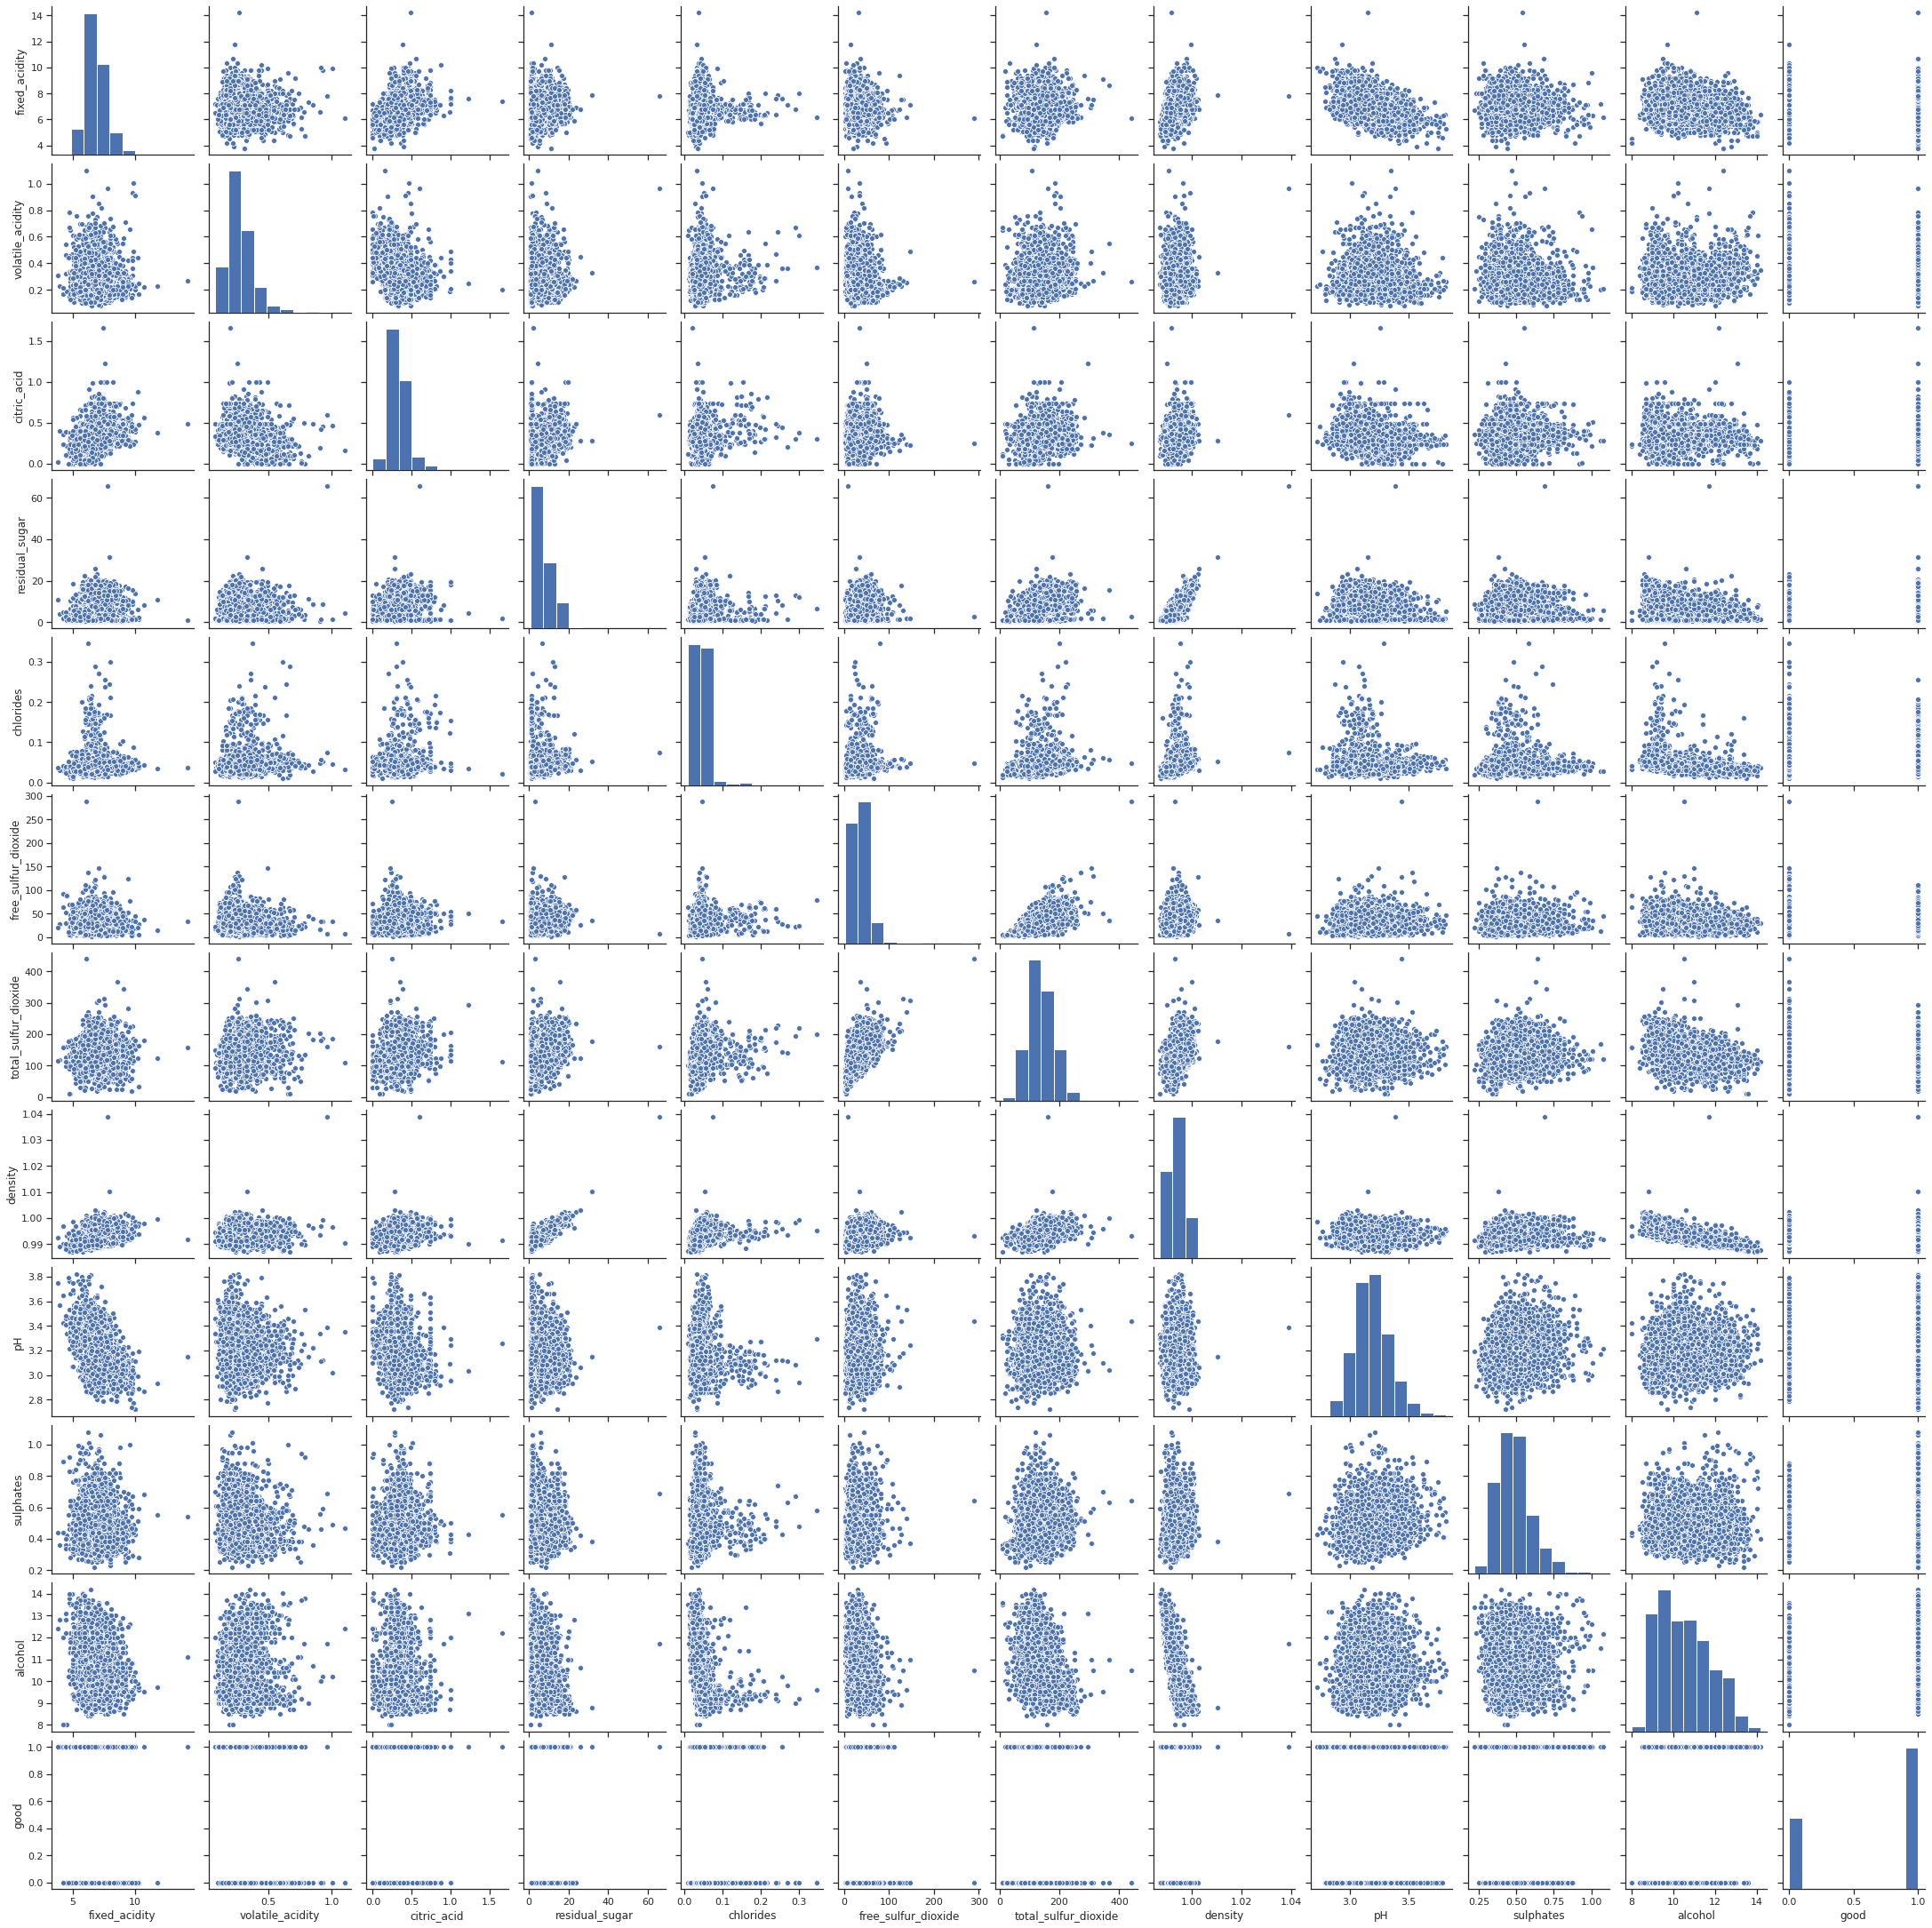

In [22]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(random_df)

15) Drop the Redundant features.

In [23]:
# Based on the pair plot the redundant features includes density, free_sulfur_dioxide, residual_sugar, as they seem to lack any variance. Of course quality can be droped as well becuase that is our target that had been changed to good.
random_df.drop(columns=['density', 
                        'residual_sugar', 
                        'fixed_acidity', 
                        'volatile_acidity', 
                        'citric_acid', 
                        'chlorides', 
                        'total_sulfur_dioxide'], inplace=True)
#random_df.drop(columns=['quality'], inplace=True)

16) Write a function named “partition” to split your data into train and test set. 

    The function should take 3 arguments: 
    
        a) Feature Matrix(numpy array with rows representing data samples and columns representing features.),
        b) Target Vector(numpy array with labels corresponding to each row of the feature matrix), 
        c) T a real number to determine the size of the test partition. 
    
    For example, if T is set to 0.2, then 80% of the data will be used for training and 20% for testing. 
    
    This function should return two feature matrices for train and test data, and two target vectors for train and test data.

In [24]:
def partition(f_matrix, t_vector, T):
    if (len(f_matrix) != len(t_vector)):
        raise Exception('Your feature matrix is not of the same length as your testing vector.')
    split_value = int(len(f_matrix)*T)
    test_matrix = f_matrix[:split_value]
    test_vector = t_vector[:split_value]
    train_matrix = f_matrix[split_value:]
    train_vector = t_vector[split_value:]
    return train_matrix, train_vector, test_matrix, test_vector

17) Naively run your **KNN_Classifier** model on the train dataset with n_neighbors= 5 and using Euclidean distance.

In [25]:
X_train, Y_train, X_test, Y_test =  partition(random_df.drop(columns=['good']).to_numpy(), random_df['good'].to_numpy(), .2)

In [26]:
kn = KNN_Classifier()

In [27]:
kn.fit(X=X_train, Y=Y_train, n_neighbors=5, weights='uniform')

In [28]:
Y_predictions = kn.predict(X_T=X_test)

  a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [29]:
cmdf = confusion_matrix_binary(actual=Y_test, prediction=Y_predictions)
tn, fp, fn, tp = confusion_matrix_binary_values(cmdf)
ppv = positive_predictive_value(TP=tp, FP=fp)
tpr = true_positive_rate(TP=tp, FN=fn)
fpr = false_positive_rate(FP=fp, TN=tn)
f1 = f1_score(PPV=ppv, TPR=tpr)
acc = accuracy(TP=tp, TN=tn, FP=fp, FN=fn)

print(f1)
print(acc)

0.7881548974943052
0.7150153217568948


b.Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.

In [30]:
# input X is a pandas Series.
# output is a standardized version of the panda Series
# https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization
def standardize(X: pd.Series):
  return pd.Series([(X[i] - X.mean())/(X.max()- X.min())  for i in range(X.count())])

In [31]:
for i in random_df.columns:
  random_df[i] = standardize(random_df[i])

c. Re-run the **KNN_Classifier** model on the standardized data, find the accuracy and F1 score with the expected labels.

In [32]:
X_train, Y_train, X_test, Y_test =  partition(random_df.drop(columns=['good']).to_numpy(), random_df['good'].to_numpy(), .2)
kn = KNN_Classifier()
kn.fit(X=X_train, Y=Y_train, n_neighbors=5, weights='uniform')
Y_predictions = kn.predict(X_T=X_test)
cmdf_2 = confusion_matrix_binary(actual=Y_test, prediction=Y_predictions)
tn, fp, fn, tp = confusion_matrix_binary_values(cmdf_2)
ppv_2 = positive_predictive_value(TP=tp, FP=fp)
tpr_2 = true_positive_rate(TP=tp, FN=fn)
fpr_2 = false_positive_rate(FP=fp, TN=tn)
f1_2 = f1_score(PPV=ppv_2, TPR=tpr_2)
acc_2 = accuracy(TP=tp, TN=tn, FP=fp, FN=fn)

print(f1_2)
print(acc_2)

0.7936746987951807
0.7201225740551583


d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment. This will go in the report.

Result: Slight increase in accuracy and F1 Score after the data has been standarized. Using the standarized data.

e. Perform a similar test for inverse distance weighting in the **KNN_Classifier** model and determine whether or not to use it.This will go in the report.

In [33]:
kn_wt = KNN_Classifier()
kn_wt.fit(X=X_train, Y=Y_train, n_neighbors=5, weights='distance')
Y_predictions_wt = kn.predict(X_T=X_test)
cmdf_wt = confusion_matrix_binary(actual=Y_test, prediction=Y_predictions_wt)
tn_wt, fp_wt, fn_wt, tp_wt = confusion_matrix_binary_values(cmdf_wt)
ppv_wt = positive_predictive_value(TP=tp_wt, FP=fp_wt)
tpr_wt = true_positive_rate(TP=tp_wt, FN=fn_wt)
fpr_wt = false_positive_rate(FP=fp_wt, TN=tn_wt)
f1_wt = f1_score(PPV=ppv_wt, TPR=tpr_wt)
acc_wt = accuracy(TP=tp_wt, TN=tn_wt, FP=fp_wt, FN=fn_wt)

print(f1_wt)
print(acc_wt)

0.7936746987951807
0.7201225740551583


18) **Evaluation of an estimator performance via cross-validation:** Implement the S-fold cross-validation function.

In [38]:
def sFold(folds, data, labels, model, model_args, error_function):
    data_size = len(data)
    s_partition_size = 1 / folds
    segment_indexes = [ [int(np.floor(s_partition_size * i * data_size)), 
                         int(np.floor(s_partition_size * (i + 1) * data_size) - 1)] for i in range(folds) ]
    ret = {}
    for p in range(folds):
        key = str('s%d' % p)
        # takes the current segment as training data
        test_data = data[segment_indexes[p][0]:segment_indexes[p][1]]
        test_labels = labels[segment_indexes[p][0]:segment_indexes[p][1]]
        
        # creates copies of the data and labels with the testing data segment removed.
        train_data = np.delete(data, np.s_[segment_indexes[p][0]:segment_indexes[p][1]], 0)
        train_labels = np.delete(labels, np.s_[segment_indexes[p][0]:segment_indexes[p][1]], 0)
        
        model.fit(train_data, train_labels, **model_args)
        prediction_labels = model.predict(X_T=test_data)
        
        # error_function is a decorator for the functioon being used 
        # so long as you pass a function without the parenthesis        
        avg_error = error_function(test_labels, prediction_labels)
        ret[key] = [test_labels, prediction_labels, avg_error]
        
    return ret
        

def mean_squared_error(test_labels, prediction_labels):
    if (len(test_labels) != len(prediction_labels)):
        raise Exception("Prediction labels are not the same length as the test labels")
    return np.sum(abs(test_labels - prediction_labels)**2) / len(test_labels)
        
        
    

19) Use your **sfold** function to evaluatethe performance of your model over each combination of k and distance metrics from the following sets: 

  1. k = [1,5,9,11]
  2. distance = [Euclidean, Manhattan]
  3. weights = [uniform, distance]
  4. Store the returned dictionary for each. We will need these for the report.
  5. Determine the best model based on the overall performance(lowest average error). For the error_function of the S-fold function argument use the F1 score function.

In [ ]:
neighbors = [1,5,9,11]
distance = [euclidian, manhattan]
weights = ['uniform', 'distance']
results = []
knn=KNN_Classifier()

for n in neighbors:
  for d in distance:
    for w in weights:
      results.append(sFold(folds=5, 
                           data=df.drop(columns=['good']).to_numpy(), 
                           labels=df['good'].to_numpy(), 
                           model=knn, 
                           model_args={'n_neighbors': n, 
                                       'weights': w, 
                                       'algorithm': d}, 
                           error_function=mean_squared_error))
    

20) Evaluate your model on the test data and report the performance measures.

  1. Precision
  2. Recall
  3. F1 score
  4. Confusion matrix
  5. Accurracy & Generalization Error

In [ ]:
precision = positive_predictive_value(TP=tp, FP=fp)
recall = true_positive_rate(TP=tp, FN=fn)

f1 = f1_score(PPV=precision, TPR=recall)

confusion_matrix_binary(actual=Y_test, prediction=Y_predictions)

acc = accuracy(TP=tp, TN=tn, FP=fp, FN=fn)

generalization_error(ACC=acc)

21) Generate the ROC curve and determine the optimal threshold. This will go in your report.

22) Compute the AUC score.


23) Generate the precision-recall curve and determine the optimal threshold.

24) Calculate and report 95% confidence interval on the generalization error estimate.

25) Write a "Data Summary" section.

  1. Describe the dataset and the variables. What is the target? What are you calculating it from?
  2. Include a table of each variables’ descriptive statistics (mean, standard deviation, quartiles).
  3. Describe whether or not you used feature scaling and why or why not.
  4. Describe whether or not you dropped anyfeature and why or why not.
  

26) Write a “Methods” section.
  1. Describe the runtime complexity of the **KNN_Classifier** model.
  2. Explain the effects of increasing k. When is and isn’t it(increasing k) effective?
  3. Describe whether or not you used inverse distance weighting in the features and why.

27) Write a “Results” section.
  1. Describe the performance of the model with respect to the different levels of k and the different distance metrics. Include a table of performances, bolding the best.
  2. Characterize the overall performance of your model.
  3. Discuss on which quality values your model performed well, and on which it performed poorly. Include a table of average error (e.g., F1 score)to support your claims.
  4. Give any final conclusions.